<a href="https://colab.research.google.com/github/jafetimbre/verbose-projects/blob/master/artificial-intelligence/rbf-stock-prec/rbf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [2]:
cols = [ "Date", "Close" ]
tsla_data = pd.read_csv("https://raw.githubusercontent.com/jafetimbre/verbose-projects/master/statistics/stock-price-pred/res/tsla_2yr_data.csv", usecols=cols)
tsla_data = tsla_data[:450]
tsla_data.head()

,Date,Close
0,2019-11-25,67.267998
1,2019-11-26,65.783997
2,2019-11-27,66.258003
3,2019-11-29,65.987999
4,2019-12-02,66.973999


In [3]:
tsla_data.describe()

,Close
count,450.000000
mean,433.907786
std,252.867234
min,65.783997
25%,161.976002
50%,425.855011
75%,667.444992
max,883.090027


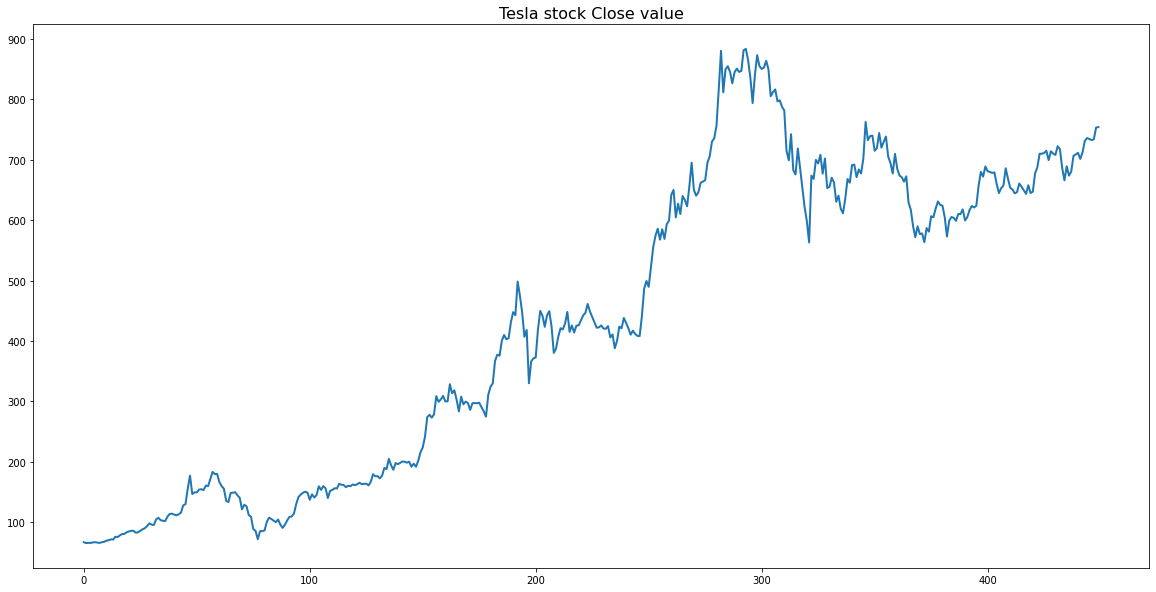

In [4]:
plt.figure(figsize=(20,10))
plt.title('Tesla stock Close value', size=16)
plt.plot(tsla_data.Close, linewidth=2)
plt.show()

In [5]:
max = tsla_data.Close.max()
data = pd.DataFrame({'val': tsla_data.Close / max})
data.describe()

,val
count,450.000000
mean,0.491352
std,0.286344
min,0.074493
25%,0.183420
50%,0.482233
75%,0.755806
max,1.000000


In [149]:
def g(x, c):
    # a1 = np.subtract(x, c)
    a1 = np.linalg.norm(x-c)
    a2 = np.power(a1, 2)
    # a3 = np.sum(a2)
    a3 = np.exp(-a2)
    # a5 = 1/a4

    # print(a1)
    # print(a2)
    # print(a3)
    # print(a4)
    # print(a5)
    # return 1 / np.exp(np.sum(np.subtract(x, c))**2)
    return a3

g(
    np.array([ 0.9, 0.8 ]),
    np.array([ 0.3, 0.4 ])
)

0.5945205479701943

[0.6]


0.697676326071031

In [244]:
data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
print(data)
print(len(data))

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
9


In [95]:
INPUT_DIM = 1
HIDDEN_DIM = 8
LEARNING_RATE = 0.2


In [282]:
pred_win = 2
hidden_dim = int(np.floor(len(data) / pred_win))

print(f"input: {pred_win}\nhidden: {hidden_dim}\ndata_usage: {pred_win*hidden_dim} / {len(data)}\n")

[ data[i:i+hidden_dim] for i in range(0, hidden_dim*pred_win) ]

input: 2
hidden: 4
data_usage: 8 / 9



[[0.1, 0.2, 0.3, 0.4],
 [0.2, 0.3, 0.4, 0.5],
 [0.3, 0.4, 0.5, 0.6],
 [0.4, 0.5, 0.6, 0.7],
 [0.5, 0.6, 0.7, 0.8],
 [0.6, 0.7, 0.8, 0.9],
 [0.7, 0.8, 0.9],
 [0.8, 0.9]]

In [268]:
class RBF():
    def __init__(self, train_data, pred_win=1, learn_rate=.2):
        self.train_data = train_data
        self.pred_win = pred_win
        self.hidden_dim = int(np.floor(len(train_data) / pred_win))

        self.learning_rate = learn_rate

        self.G = np.zeros(self.hidden_dim)
        self.W = 2 * np.random.random(self.hidden_dim) - 1
        self.Y = 0
        print(self.hidden_dim)
        self.Xi = [ train_data[i:i+self.hidden_dim] for i in range(0, self.hidden_dim*pred_win) ]
        print(self.Xi)


    @staticmethod
    def g(x, c):
        return np.exp(-np.power(np.linalg.norm(x-c), 2))


    def compute(self, x):
        if len(x) != self.pred_win:
            raise Exception("Input vector dim invalid")
        self.G = np.array([ g(x, self.Xi[i]) for i in range(self.hidden_dim)])
        return np.sum(np.multiply(self.G, self.W))


    def update(self, error):
        for i in range(self.hidden_dim):
            deltaW = self.learning_rate * self.G[i] * error
            self.W[i] += deltaW


    def fit(self, iters=1):

        data = [self.train_data[t:t+self.pred_win] for t in range(0, self.hidden_dim*self.pred_win)]
        print(data)

        # for i in range(iters):
            

        #     data_slice_x = train_data[dat_i:dat_i + self.data_entr_in]
        #     data_slice_y = train_data[dat_i + self.data_entr_in]





In [272]:
print(len(data))
rbf = RBF(data, pred_win=3)

# rbf.compute(np.array([.2, .3]))
# rbf.fit()

9
3
[[0.1, 0.2, 0.3], [0.2, 0.3, 0.4], [0.3, 0.4, 0.5], [0.4, 0.5, 0.6], [0.5, 0.6, 0.7], [0.6, 0.7, 0.8]]


In [187]:
STEP_COUNT = 100

W = 2 * np.random.random(HIDDEN_DIM) - 1
G = [ 0 for i in range(HIDDEN_DIM) ]
Y = None

for step in range(STEP_COUNT):
    for i in range(0, HIDDEN_DIM):
        x = data[i]
        z = data[i+1]
        # print(f"{x} / {z}")
        
        # computng Gs
        for ig in range(len(G)):
            G[ig] = g(np.array(x), np.array(data[ig]))
        

        # print(G)

        Y = np.sum(np.multiply(G, W))

        err = z - Y

        # print(f"Y:      {Y}")
        print(f"Err:    {err}")
        # print()


        for iw in range(len(W)):
            deltaW = LEARNING_RATE * G[iw] * err
            # print(deltaW)
            W[iw] += deltaW

Err:    1.6416964145820945
Err:    -0.6792596861019659
Err:    1.1391788499939695
Err:    -1.1402883088512303
Err:    0.6523823164569021
Err:    -0.010079629111409805
Err:    -0.5932307690457617
Err:    1.0255452916601207
Err:    -1.0789775563929052
Err:    0.20519462009590916
Err:    0.7076131687028703
Err:    -0.8201716638136033
Err:    0.4040734444883495
Err:    0.1411595860220889
Err:    -0.548426446170354
Err:    0.8465488452282541
Err:    -0.8959390991042521
Err:    0.05251196227091759
Err:    0.6913565058430358
Err:    -0.6198236857415179
Err:    0.2111475048751611
Err:    0.26171565617384596
Err:    -0.5094985493884853
Err:    0.6980041630899138
Err:    -0.7443315757030876
Err:    -0.07387518836033535
Err:    0.6779168409550305
Err:    -0.45405543675041116
Err:    0.05152686450427535
Err:    0.361465297499481
Err:    -0.47729773994643043
Err:    0.5751038215319095
Err:    -0.6188914760750169
Err:    -0.1784467231922
Err:    0.6667853723397428
Err:    -0.3168942731874077
Err:   

In [177]:
W

array([-0.60890885,  0.8640537 , -0.9494672 , -0.12918268, -0.07037505,
       -0.02908723,  0.30842855,  1.31097228])

In [188]:
for ig in range(len(G)):
    G[ig] = g(np.array(0.62048261 ), np.array(data[ig]))
        

# print(G)

Y = np.sum(np.multiply(G, W))

print(f"predicted: {Y}")
print("expected: 0.35183286")

predicted: 0.3695906697521971
expected: 0.35183286


In [75]:
a = [1, 2]
b = [4, 7]

np.multiply(a,b)

array([ 4, 14])

In [70]:
G

[0.612626394184416,
 0.697676326071031,
 0.7788007830714049,
 0.8521437889662113,
 0.9139311852712282,
 0.9607894391523232,
 0.9900498337491681,
 1.0]

In [ ]:
h = 
hw = 2 * np.random.random(dim) - 1

In [33]:
t = []
for i in range(0, 2, 0.1):
    arr = []
    for j in range(0, 2, .1):
        arr.append(a[i] * b[j])
    t.append(arr)

TypeError: ignored

In [28]:
class Layer():
    def __init__(self, idx, dim, is_output=False):
        self.idx = idx
        self.weights = 2 * np.random.random(dim) - 1
        self.is_output = is_output
        self.act_func = g 
        self.G = None
        self.dZ = None
        self.delta = None
        self.c = None


    def feed_forward(self, x):
        z = np.dot(x, self.weights)
        self.G = self.act_func(z, self.c)
        return self.G


    def update_weights(self, learning_rate, prev_val):
        val = np.atleast_2d(prev_val)
        delt = np.atleast_2d(self.delta)
        change = val.T.dot(delt)
        self.weights -= learning_rate * change


In [44]:
class Network():
    def __init__(self, layers_dim):
        self.data_entr_in = layers_dim[0]
        self.data_entr_out = layers_dim[-1]
        self.layers = []
        for i in range(1, len(layers_dim)):
            new_layer_dim = (layers_dim[i-1], layers_dim[i])
            is_output_layer = i == len(layers_dim)-1 
            self.layers.append(Layer(i, new_layer_dim, is_output=is_output_layer))

    
    def fit(self, train_data, learning_rate=.2, iters=1):
        errors = []
        for iter_i in range(iters):
            iter_error = 0

            for dat_i in range(len(train_data) - self.data_entr_in):
                data_slice_x = train_data[dat_i:dat_i + self.data_entr_in]
                data_slice_y = train_data[dat_i + self.data_entr_in]
                
                step_val = data_slice_x
                for layer in self.layers:
                    print(layer)
                    # step_val = layer.feed_forward(step_val)

                # iter_error += abs(np.average(self.layers[-1].A - data_slice_y))

                # delta = self.layers[-1].back_propagation(data_slice_y, None)
                # for layer_i in range(len(self.layers)-2, -1, -1):
                #     delta = self.layers[layer_i].back_propagation(delta, self.layers[layer_i+1])

                # step_val = data_slice_x
                # for layer in self.layers:
                #     layer.update_weights(learning_rate, step_val)
                #     step_val = layer.A

            # errors.append(iter_error / dat_i)
            # print(f'Iter {iter_i+1}/{iters}     err: {errors[-1]}')

        return errors
        
    
    def test(self, x):
        errors = []
        y = []
        for dat_i in range(len(x) - self.data_entr_in):
            data_slice_x = x[dat_i:dat_i + self.data_entr_in]
            data_slice_y = x[dat_i + self.data_entr_in]
            
            step_val = data_slice_x
            for layer in self.layers:
                step_val = layer.feed_forward(step_val)

            y.extend(self.layers[-1].A)
            errors.extend(abs(self.layers[-1].A - data_slice_y))

        if self.data_entr_out > 1:
            y = (self.data_entr_out-1)*[y[0]] + y
            errors = (self.data_entr_out-1)*[errors[0]] + errors

            rem = len(y) % self.data_entr_out
            if rem > 0:
                y = y[:-rem]
                errors = errors[:-rem]

            y = np.average(np.array(y).reshape(-1, self.data_entr_out), axis=1)
            errors = np.average(np.array(errors).reshape(-1, self.data_entr_out), axis=1)

        return (y, errors)

    def forecast(self, x):
        step_val = np.array(x)
        for layer in self.layers:
            step_val = layer.feed_forward(step_val)
        return step_val

In [45]:
n = Network([1, 300, 1])
n.layers
# n.fit(list(range(100)))

[]

In [37]:
n